<a href="https://colab.research.google.com/github/alipcendol19/image-classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/alipcendol19/image-classification.git

Cloning into 'image-classification'...


In [ ]:
# Proyek Akhir Klasifikasi Gambar, Belajar Machine Learning Untuk Pemula, Dicoding Indonesia

# Nama  : Allif Khoirul Anaam
# Email : allifkhairulanam19@gmail.com

# **1. Menyiapkan Direktori Folder**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 1.1. Mengekstraksi zip file *rockpaperscissors*.zip ke direktori folder *rockpaperscissors*

In [ ]:
import zipfile
import os

zip_rockpaperscissors = '/content/gdrive/My Drive/rockpaperscissors.zip'

extract_rockpaperscissors = '/content/gdrive/My Drive/'

with zipfile.ZipFile(zip_rockpaperscissors, 'r') as zip_ref:
    zip_ref.extractall(extract_rockpaperscissors)

1.1.1. Cek isi folder *rockpaperscissors*

In [ ]:
os.listdir('/content/gdrive/My Drive/rockpaperscissors')

['paper', 'rock', 'rps-cv-images', 'scissors', 'README_rpc-cv-images.txt']

1.1.2. Cek jumlah data folder *rock*

In [ ]:
len(os.listdir('/content/gdrive/My Drive/rockpaperscissors/rock'))

726

1.1.3. Cek jumlah data folder scissors

In [ ]:
len(os.listdir('/content/gdrive/My Drive/rockpaperscissors/scissors'))

750

1.1.4. Cek jumlah data folder *paper*

In [ ]:
len(os.listdir('/content/gdrive/My Drive/rockpaperscissors/paper'))

712

## 1.2. Membuat folder baru *train* dan *validation*

In [ ]:
folder_rockpaperscissors = '/content/gdrive/My Drive/rockpaperscissors'
train_rockpaperscissors = os.path.join(folder_rockpaperscissors,'train')
validation_rockpaperscissors = os.path.join(folder_rockpaperscissors, 'val')

In [ ]:
os.mkdir(train_rockpaperscissors)
os.mkdir(validation_rockpaperscissors)

In [ ]:
rock_dir = os.path.join(folder_rockpaperscissors,'rock')
paper_dir = os.path.join(folder_rockpaperscissors, 'paper')
scissors_dir = os.path.join(folder_rockpaperscissors, 'scissors')

## 1.3. Membagi folder direktori antara *train* dan *validation* bagi *rock*, *paper*, dan *scissors*

1.3.1. Menyiapkan direktori *train* dan *validation* bagi masing-masing *rock, paper, dan scissors*

In [ ]:
#Ukuran validation sebesar 40%

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

1.3.2. Menyalin data *train* dan *validation* ke direktori baru

In [ ]:
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

1.3.3. Cek masing-masing jumlah data pada direktori folder

In [ ]:
len(os.listdir('/content/gdrive/My Drive/rockpaperscissors/train/rock'))

435

In [ ]:
len(os.listdir('/content/gdrive/My Drive/rockpaperscissors/val/rock'))

291

In [ ]:
len(os.listdir('/content/gdrive/My Drive/rockpaperscissors/train/scissors'))

450

In [ ]:
len(os.listdir('/content/gdrive/My Drive/rockpaperscissors/val/scissors'))

300

In [ ]:
len(os.listdir('/content/gdrive/My Drive/rockpaperscissors/train/paper'))

427

In [ ]:
len(os.listdir('/content/gdrive/My Drive/rockpaperscissors/val/paper'))

285

# **2. Mengaplikasikan Machine Learning**

## 2.1. Memanggil Library ML

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

## 2.2. Membuat *image data generator*

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


## 2.3. Membuat Model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

## 2.4. Melatih Model

In [ ]:
# Model dilatih sebanyak 20 kali

history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 59s - loss: 1.1117 - accuracy: 0.3638 - val_loss: 1.0043 - val_accuracy: 0.4812 - 59s/epoch - 2s/step
Epoch 2/20
25/25 - 50s - loss: 0.7031 - accuracy: 0.7150 - val_loss: 0.4469 - val_accuracy: 0.8625 - 50s/epoch - 2s/step
Epoch 3/20
25/25 - 49s - loss: 0.3891 - accuracy: 0.8838 - val_loss: 0.3344 - val_accuracy: 0.8938 - 49s/epoch - 2s/step
Epoch 4/20
25/25 - 51s - loss: 0.2632 - accuracy: 0.9050 - val_loss: 0.2633 - val_accuracy: 0.8938 - 51s/epoch - 2s/step
Epoch 5/20
25/25 - 52s - loss: 0.1912 - accuracy: 0.9325 - val_loss: 0.1577 - val_accuracy: 0.9500 - 52s/epoch - 2s/step
Epoch 6/20
25/25 - 50s - loss: 0.1329 - accuracy: 0.9650 - val_loss: 0.1146 - val_accuracy: 0.9625 - 50s/epoch - 2s/step
Epoch 7/20
25/25 - 57s - loss: 0.1729 - accuracy: 0.9525 - val_loss: 0.2233 - val_accuracy: 0.9312 - 57s/epoch - 2s/step
Epoch 8/20
25/25 - 50s - loss: 0.1412 - accuracy: 0.9500 - val_loss: 0.0946 - val_accuracy: 0.9625 - 50s/epoch - 2s/step
Epoch 9/20
25/25 - 51s - loss: 0

## 2.5. Visualisasi hasil data training


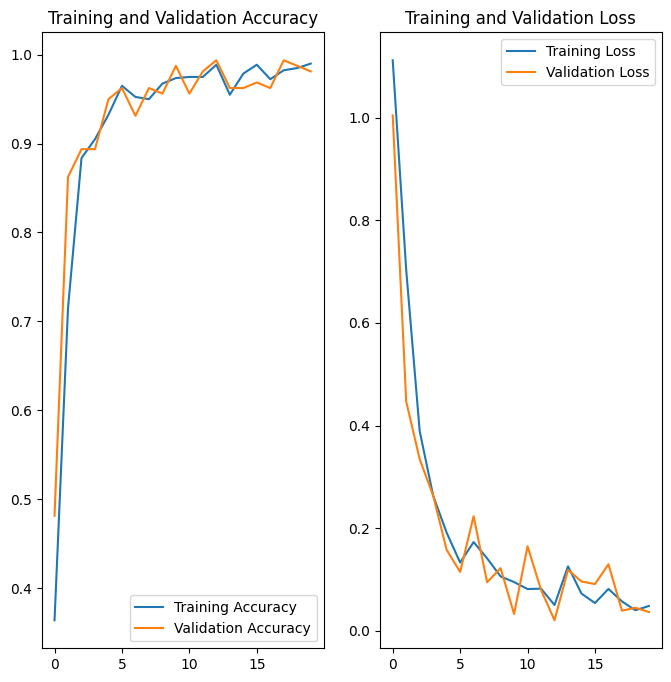

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Berdasarkan grafik di atas, terlihat bahwa tingkat *training accuracy* dan *validation accuracy* memiliki perbedaan yang tidak signifikan, dan keduanya semakin meningkat seiring berjalannya waktu, mengindikasikan ketiadaan overfitting. Selain itu, nilai *loss training* dan *loss validation* juga cenderung menurun seiring berjalannya waktu, menunjukkan bahwa model yang digunakan cukup baik.

# **3. Memprediksi Gambar**

Saving Bd18RfxcJr6O5n6j.png to Bd18RfxcJr6O5n6j.png
1/1 [==============================] - 0s 152ms/step
Bd18RfxcJr6O5n6j.png
scissors


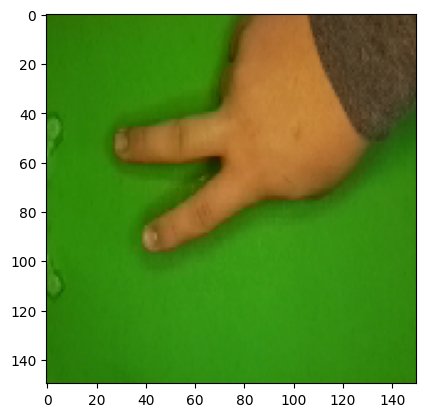

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')